# Load Prediction for 1D Linear Elastic Problems

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics


In [2]:
# uploading the dataset
df = pd.read_excel(r'F_Dataset.xlsx')
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (300, 5)


In [3]:
#checking the first elements of the dataset.
df.head(10)

,h_e,f_e,A,te,Fe
0,0.003344,0.3,15.991892,-0.5,0.003177
1,0.003344,0.3,15.985811,-1.5,0.001503
2,0.003344,0.3,15.979730,0.5,0.004846
3,0.003344,0.3,15.973650,-0.5,0.003172
4,0.003344,0.3,15.967569,-1.5,0.001498
5,0.003344,0.3,15.961488,0.5,0.004841
6,0.003344,0.3,15.955407,-0.5,0.003168
7,0.003344,0.3,15.949326,-1.5,0.001494
8,0.003344,0.3,15.943245,0.5,0.004837
9,0.003344,0.3,15.937164,-0.5,0.003163


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   h_e     300 non-null    float64
 1   f_e     300 non-null    float64
 2   A       300 non-null    float64
 3   te      300 non-null    float64
 4   Fe      300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [5]:
# checking the description
df.describe()

,h_e,f_e,A,te,Fe
count,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000
mean,3.344482e-03,3.000000e-01,15.085852,-0.393667,0.003127
std,9.268499e-11,1.668117e-15,0.524861,1.076564,0.001815
min,3.344480e-03,3.000000e-01,14.179791,-3.500000,-0.001965
25%,3.344482e-03,3.000000e-01,14.634337,-1.500000,0.001401
50%,3.344482e-03,3.000000e-01,15.087362,-0.500000,0.002959
75%,3.344482e-03,3.000000e-01,15.537347,0.500000,0.004536
max,3.344482e-03,3.000000e-01,15.991892,6.700000,0.015086


## Data Cleaning

In [6]:
#checking the null values
df.isnull().mean()*100

h_e    0.0
f_e    0.0
A      0.0
te     0.0
Fe     0.0
dtype: float64

In [7]:
df.duplicated().mean()*100

0.0

## Data Visualization 

C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


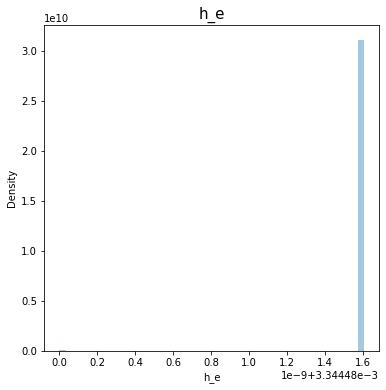

C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


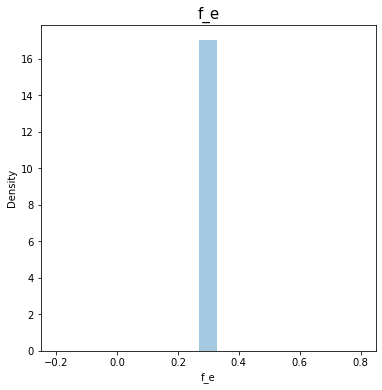

C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


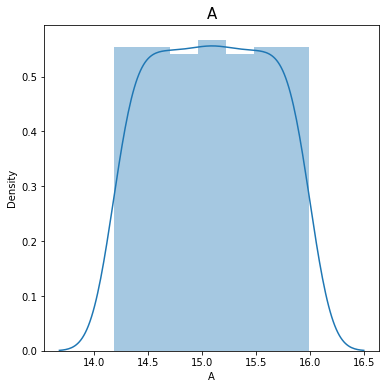

C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


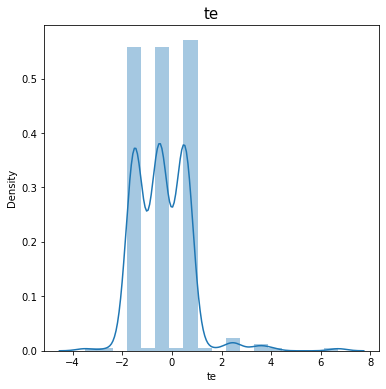

C:\Users\Zaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


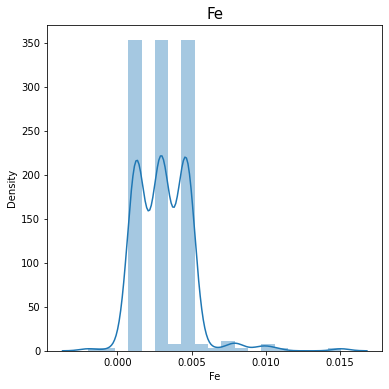

In [8]:
# distributions
for i in df.columns:
    plt.figure(figsize=(6,6))
    sns.distplot(df[i])
    plt.title(i, size=15)
    plt.show()

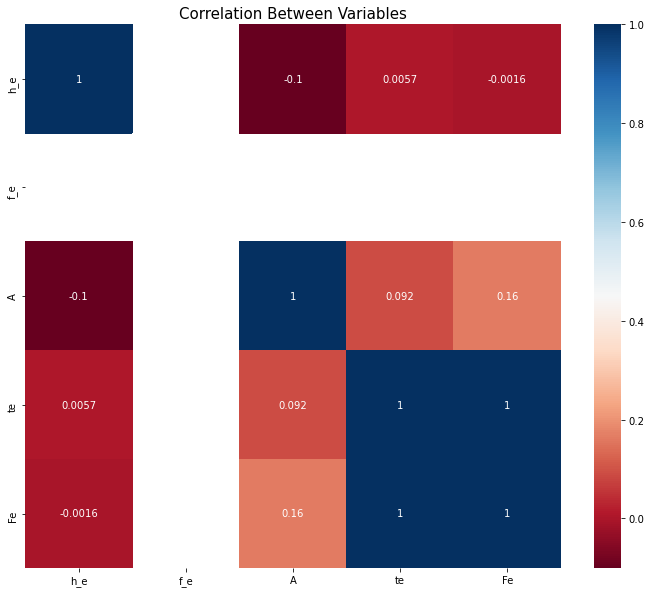

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlation Between Variables", size=15)
plt.show()

## Data Preprocessing

In [10]:
# splitting into train and test sets: 


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Fe'], axis=1), df['Fe'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((210, 4), (90, 4))

## Machine Learning Models

In [11]:
def error_display(y_test, y_pred):
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

### Linear Regression

In [12]:
# defining the Linear Regression algorithm
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred.reshape(-1,1)

array([[ 0.00118725],
       [ 0.00456223],
       [ 0.00315845],
       [ 0.0045119 ],
       [ 0.00448444],
       [ 0.00129707],
       [ 0.00449817],
       [ 0.00453478],
       [ 0.00777971],
       [ 0.00301202],
       [ 0.00440665],
       [ 0.00315387],
       [ 0.00122385],
       [ 0.00447071],
       [ 0.00147095],
       [ 0.00473612],
       [ 0.00276492],
       [ 0.00303947],
       [ 0.00115521],
       [ 0.00459884],
       [ 0.0012147 ],
       [ 0.0013474 ],
       [ 0.00131537],
       [ 0.00297998],
       [ 0.00283813],
       [ 0.00467205],
       [ 0.00455308],
       [ 0.00106827],
       [ 0.00281983],
       [ 0.00105454],
       [ 0.00470866],
       [ 0.00307608],
       [ 0.00483679],
       [ 0.0046629 ],
       [ 0.00284271],
       [ 0.00294795],
       [ 0.00458054],
       [ 0.00457138],
       [ 0.00796696],
       [ 0.00484136],
       [ 0.00116437],
       [ 0.00471324],
       [-0.00029128],
       [ 0.00145265],
       [ 0.00142062],
       [ 0

In [13]:
error_display(lr_pred, y_test)

MAE: 2.5506459958378277e-06
MSE: 5.855215496045554e-10
RMSE: 2.419755255401991e-05


### Random Forest Regressor

In [14]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred.reshape(-1,1)

array([[ 0.0011866 ],
       [ 0.0045637 ],
       [ 0.00316   ],
       [ 0.00451629],
       [ 0.00447872],
       [ 0.00130173],
       [ 0.00449625],
       [ 0.00453743],
       [ 0.0083226 ],
       [ 0.00301247],
       [ 0.0044078 ],
       [ 0.00314934],
       [ 0.00122202],
       [ 0.00446975],
       [ 0.00147347],
       [ 0.00473194],
       [ 0.0027656 ],
       [ 0.00302076],
       [ 0.00115434],
       [ 0.00460108],
       [ 0.00121196],
       [ 0.00134855],
       [ 0.00131217],
       [ 0.0029804 ],
       [ 0.00284129],
       [ 0.00467169],
       [ 0.00454947],
       [ 0.00106667],
       [ 0.00281951],
       [ 0.00105816],
       [ 0.00470157],
       [ 0.00307612],
       [ 0.00483111],
       [ 0.0046635 ],
       [ 0.00284829],
       [ 0.00294718],
       [ 0.00458067],
       [ 0.00457111],
       [ 0.00808663],
       [ 0.00483793],
       [ 0.00116189],
       [ 0.00468341],
       [-0.00056092],
       [ 0.0014543 ],
       [ 0.0014154 ],
       [ 0

In [15]:
error_display(rf_pred, y_test)

MAE: 3.0081923303419562e-05
MSE: 2.333164890308001e-08
RMSE: 0.00015274700947344276


### Decision Tree Regressor

In [16]:
dtr =  DecisionTreeRegressor().fit(X_train, y_train)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred.reshape(-1,1)

array([[ 0.00118267],
       [ 0.00456681],
       [ 0.00316302],
       [ 0.00451647],
       [ 0.00447987],
       [ 0.00130164],
       [ 0.00449359],
       [ 0.00453935],
       [ 0.00789355],
       [ 0.00301659],
       [ 0.00441123],
       [ 0.00314929],
       [ 0.00121928],
       [ 0.00446614],
       [ 0.00147553],
       [ 0.00473154],
       [ 0.00276949],
       [ 0.0030349 ],
       [ 0.00115064],
       [ 0.00460342],
       [ 0.00121012],
       [ 0.00135198],
       [ 0.00131079],
       [ 0.00297541],
       [ 0.00284728],
       [ 0.00466748],
       [ 0.00454851],
       [ 0.0010637 ],
       [ 0.0028244 ],
       [ 0.00105912],
       [ 0.00470409],
       [ 0.0030715 ],
       [ 0.00483221],
       [ 0.00466748],
       [ 0.00284728],
       [ 0.00295253],
       [ 0.00457596],
       [ 0.00456681],
       [ 0.00789355],
       [ 0.00484594],
       [ 0.00115979],
       [ 0.00470409],
       [-0.00196505],
       [ 0.00145722],
       [ 0.00141604],
       [ 0

In [17]:
error_display(dtr_pred, y_test)

MAE: 3.718576351990218e-05
MSE: 3.944818965032896e-08
RMSE: 0.0001986156832939659


### XGBoost Regressor

In [18]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train, y_train)
xgb_pred = xgb_r.predict(X_test)
xgb_pred.reshape(-1,1)

C:\Users\Zaur\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([[0.00129017],
       [0.00448327],
       [0.00306373],
       [0.00448327],
       [0.00448327],
       [0.00135887],
       [0.00448327],
       [0.00448327],
       [0.00786889],
       [0.00301077],
       [0.00448327],
       [0.00306373],
       [0.00129017],
       [0.00448327],
       [0.00141182],
       [0.00468177],
       [0.00286523],
       [0.00301077],
       [0.00129017],
       [0.00448327],
       [0.00129017],
       [0.00135887],
       [0.00135887],
       [0.00293393],
       [0.00286523],
       [0.00455197],
       [0.00448327],
       [0.00129017],
       [0.00286523],
       [0.00129017],
       [0.00462882],
       [0.00306373],
       [0.00468177],
       [0.00455197],
       [0.00286523],
       [0.00293393],
       [0.00448327],
       [0.00448327],
       [0.00773909],
       [0.00468177],
       [0.00129017],
       [0.00468177],
       [0.00141182],
       [0.00141182],
       [0.00141182],
       [0.00135887],
       [0.00448327],
       [0.001

In [19]:
error_display(xgb_pred, y_test)

MAE: 9.712393413036082e-05
MSE: 5.468319929987776e-08
RMSE: 0.0002338443912089357


### After ML

In [20]:
rf_pred_df = pd.DataFrame(rf_pred)
rf_pred_df.to_csv('RandomForest_F.csv', index = False)

In [21]:
lr_pred_df = pd.DataFrame(lr_pred)
lr_pred_df.to_csv('LinearRegression_F.csv', index = False)

In [22]:
xgb_pred_df = pd.DataFrame(xgb_pred)
xgb_pred_df.to_csv('XGBoostRegression_F.csv', index = False)

In [23]:
df_test = pd.DataFrame(y_test)
df_test.to_csv('Exact_F.csv', index = False)

In [24]:
rf_df = pd.read_csv(r'RandomForest_F.csv')
lr_df = pd.read_csv(r'LinearRegression_F.csv')
xgb_df = pd.read_csv(r'XGBoostRegression_F.csv')

In [25]:
def plott(df, title1, title2):
    plt.plot(df[title1][:50], label = 'predicted', color = 'red')
    plt.plot(df[title2][:50], label = 'exact', color = 'blue')
    plt.legend()

Text(0.5, 1.0, 'Random Forest Regressor')

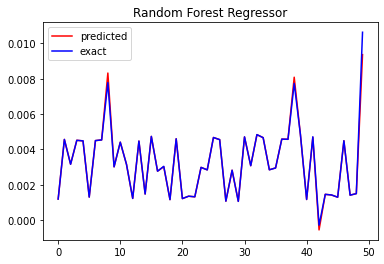

In [26]:
plott(rf_df, 'Predicted', 'Exact')
plt.title('Random Forest Regressor')

Text(0.5, 1.0, 'Linear Regressor')

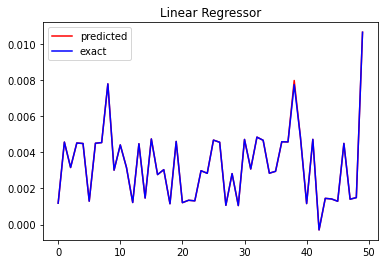

In [27]:
plott(lr_df, 'Predicted', 'Exact')
plt.title('Linear Regressor')

Text(0.5, 1.0, 'XGBoost Regressor')

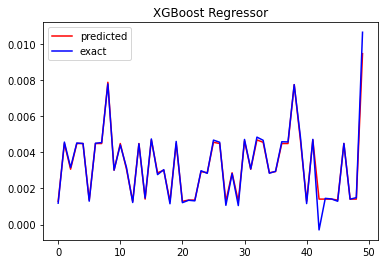

In [28]:
plott(xgb_df, 'Predicted', 'Exact')
plt.title('XGBoost Regressor')